In [1]:
import os
import sys
sys.path.append("..")

from src.eval.SampleResult import SampleResult
from src.eval.utils.draw_alignments import draw
from src.eval.utils.draw_wave import draw_wave

In [2]:
RESULTS_05_05 = "../out/2025-05-05_13-29-23_librispeech-pc-test-clean_large-v3-turbo"
RESULTS_05_02 = "../out/2025-05-02_10-50-33_librispeech-pc-test-clean_large-v3-turbo"
RESULTS_ASSEMBLY = "../out/assemblyai"

In [3]:
RESULTS = RESULTS_ASSEMBLY

In [4]:
files = os.listdir(RESULTS)
files = [f for f in files if f.endswith("final.json")]

# get ids from the first part of the filename separated by "_"
file_ids = [f.split("_")[0] for f in files]

samples = [SampleResult.load_by_id(RESULTS, file_id) for file_id in file_ids]

/Users/niko/Code/streaming-asr-evaluation/notebooks/../src/eval/SampleResult.py:158: UserWarning: Final MFA file not found: ../out/assemblyai/mfa/121-121726-0000/121-121726-0000.TextGrid
  warnings.warn(f"Final MFA file not found: {final_mfa_path}")


In [5]:
print("Number of samples:", len(samples))

Number of samples: 1


In [10]:
for sample in samples:
    sample.build_alignments(align_to="mfa", temporal_tolerance=0.5)

In [11]:
s = next((s for s in samples if s.sample_id == "121-121726-0000"), None)

In [12]:
for p in s.partials:
    if p.window[1] == 0.0:
        p.window = (0.0, p.observation_time)

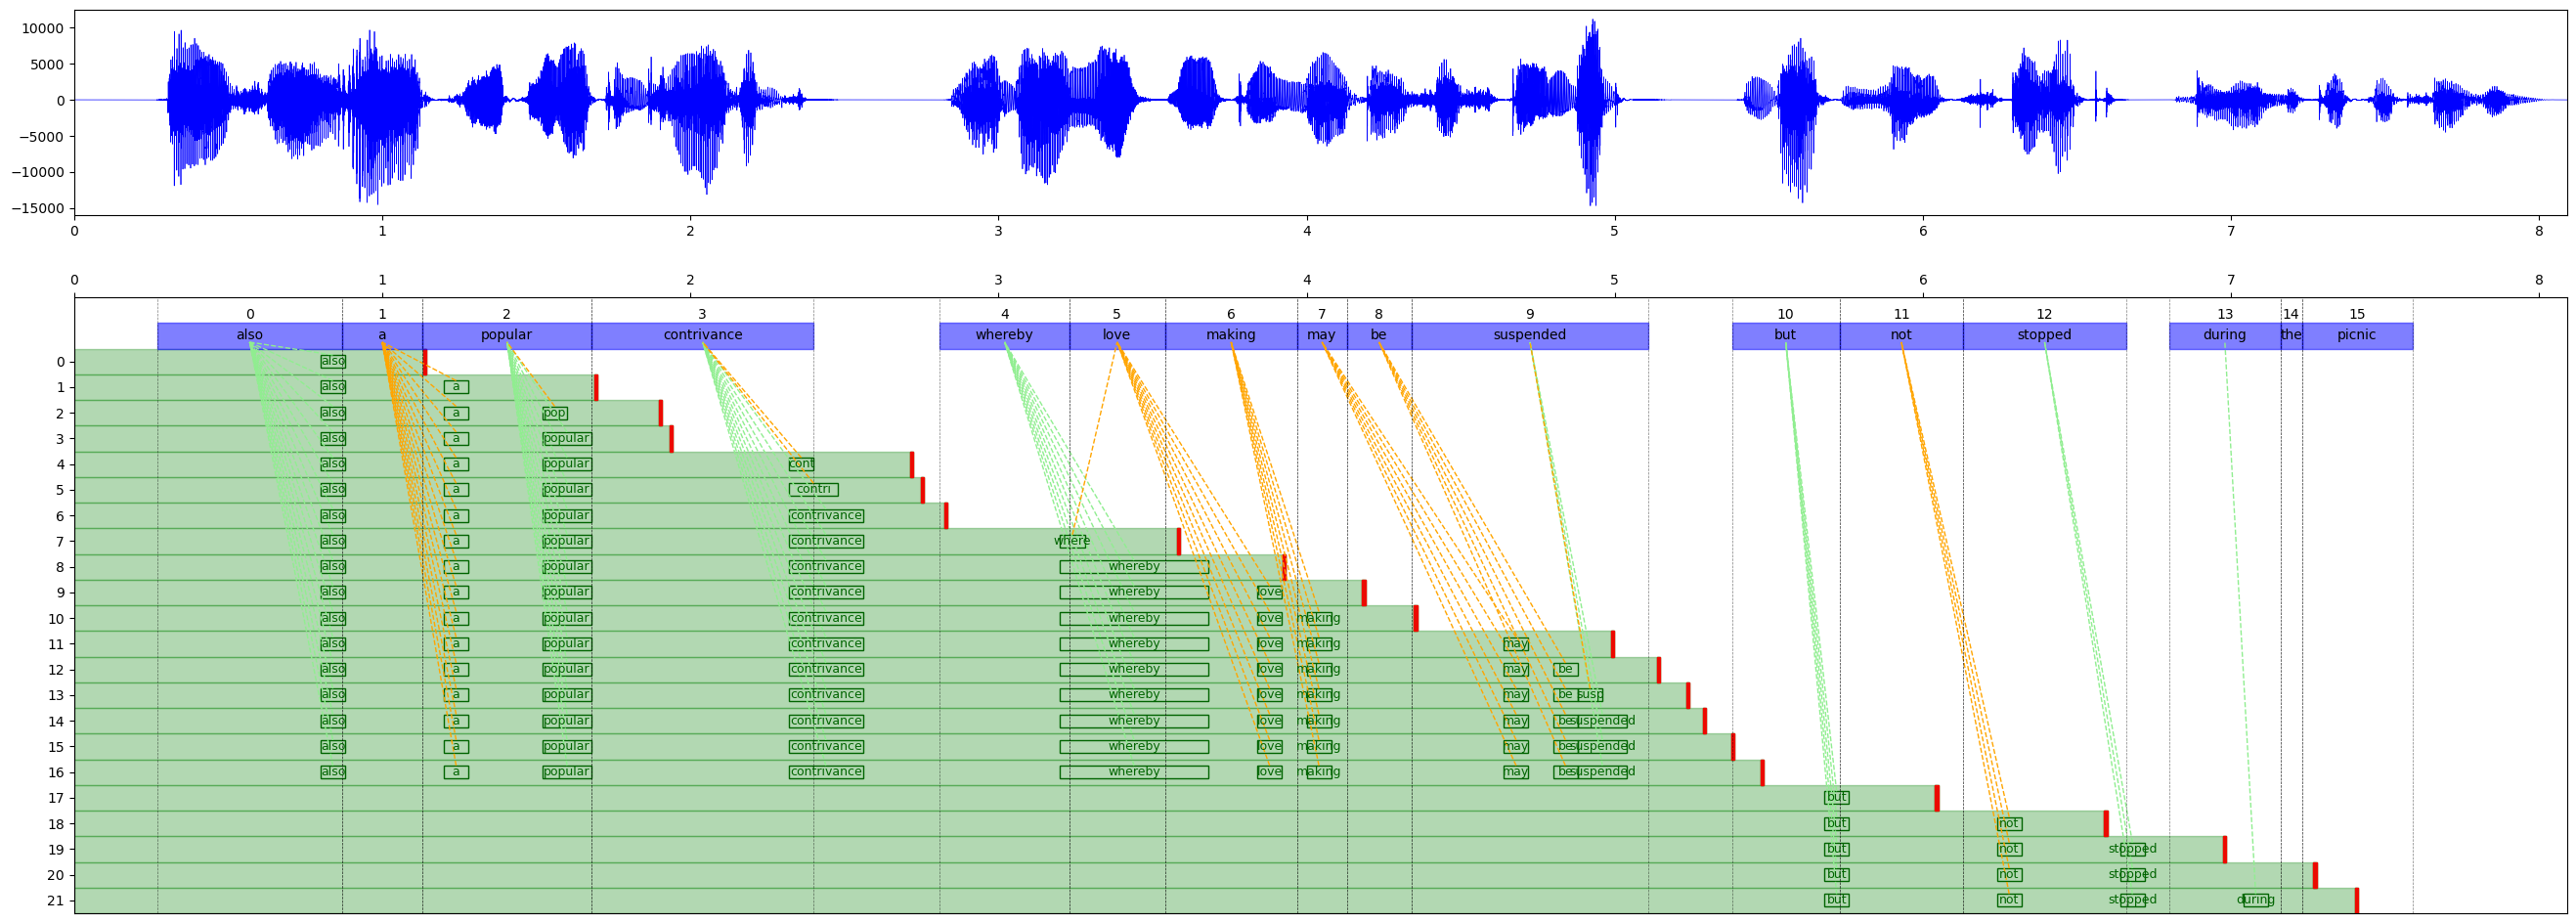

In [13]:
start_t, end_t = draw(s, 0, 16, wave=True)